# <a id='toc1_'></a>[Experimental Design for Single Qubit Hamiltonian Learning](#toc0_)

These scenarios consider a two-level quantum system whose binary measurement probabilities undergo oscillations at an unknown frequency \cite{Ferrie_2012, Wiebe_2016, Granade_2012, Wiebe_2014a}, induced by the time-independent Hamiltonian:
$$ H = \frac{\omega}{2}\sigma_i, $$

with $i \in \{x, y, z\}$. In the Bloch sphere, this causes a precession of the Bloch vector around the axis corresponding to $\sigma_i$.  The resulting probabilities for another observable $\sigma_j$, $j \neq i$ are given by: 
$$\mathbf{P}(x\mid \omega;t)=\left(\sin^2(\omega t) \right)^x\left(\cos^2(\omega t) \right)^{1-x}$$

, with $x \in \{0,1\}$ a binary outcome, $\omega$ the parameter of interest (a frequency to be estimated), and $t$ the evolution time before measurement. The latter being a controllable parameter, it can be used as an experimental control; measuring the system at different times amounts to sampling from different instances of a parametrized probability distribution. Our goal is to choose a sequence of measurement times, optimizing the data collection of $(t,x)$ tuples to enable quantum-enhanced estimation of $\omega$. 

We applu Bayesian inference to this problem. For the choices of measurement times, we consider 5 different strategies: 

- The $1/\sigma$ heuristic (SH), which chooses $t_{i+1} \propto 1/\sigma_i$, with $\sigma_i$ the standard deviation of the latest Bayesian distribution;
- The particle guess heuristic (PGH), which is similar to SH but replaces $\sigma_i$ by $\lvert w_a-w_b \rvert$, where $w_a, w_b$ are two random samples of the lastest Bayesian distribution;
- A random times strategy, with times sampled from $\sim [0, tmax]$
- The window expansion strategy (WES), which minimizes the expected variance by applying Bayesian experimental design with some problem specific tricks;
- The annealed window expansion strategy (aWES), which is similar to WES but optimizes a metric of statistic robustness rather than the variance. 

All hyperparameters were previously optimized with a parameter sweep.



**Table of contents**<a id='toc0_'></a>    
- [Experimental Design for Single Qubit Hamiltonian Learning](#toc1_)    
  - [Plotting from pre-existing datasets](#toc1_1_)    
    - [Noiseless case](#toc1_1_1_)    
    - [Noisy case](#toc1_1_2_)    
  - [Running the code](#toc1_2_)    
    - [$1/\sigma$ heuristic (SH)](#toc1_2_1_)    
    - [Particle guess heuristic (PGH)](#toc1_2_2_)    
    - [Random times strategy (RTS)](#toc1_2_3_)    
    - [Window expansion heuristic (WES)](#toc1_2_4_)    
    - [Annealed window expansion strategy (WES)](#toc1_2_5_)    
  - [References](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Plotting from pre-existing datasets](#toc0_)



In [ ]:
from scripts.plotting_from_files import plot_estimation_from_files

### <a id='toc1_1_1_'></a>[Noiseless case](#toc0_)

These results are plotted directly from the folder `datasets/noiseless`.

> Will plot frequency estimation results from folder 'noiseless'.


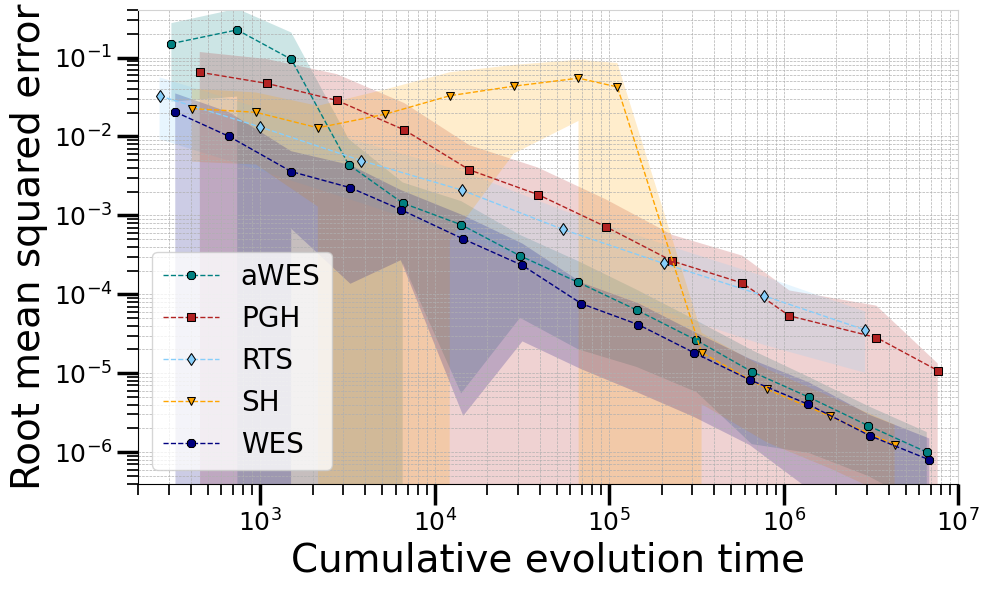

In [2]:
plot_estimation_from_files(noise = False, separate = False)

We can also plot each algorithm separately for more detail and a comparison with the fundamental limits of metrology. This also prints the parameters estimated by a fit to the data, i.e. $m$ and $b$ in $\mathrm{error} = \exp(b)*Nq^{m}$, which correspond respectively to the slope and offset in a loglog plot.

> Will plot frequency estimation results from folder 'noiseless'.
> aWES root mean squared error = O(Nq^-1.0); offset = 2.66.


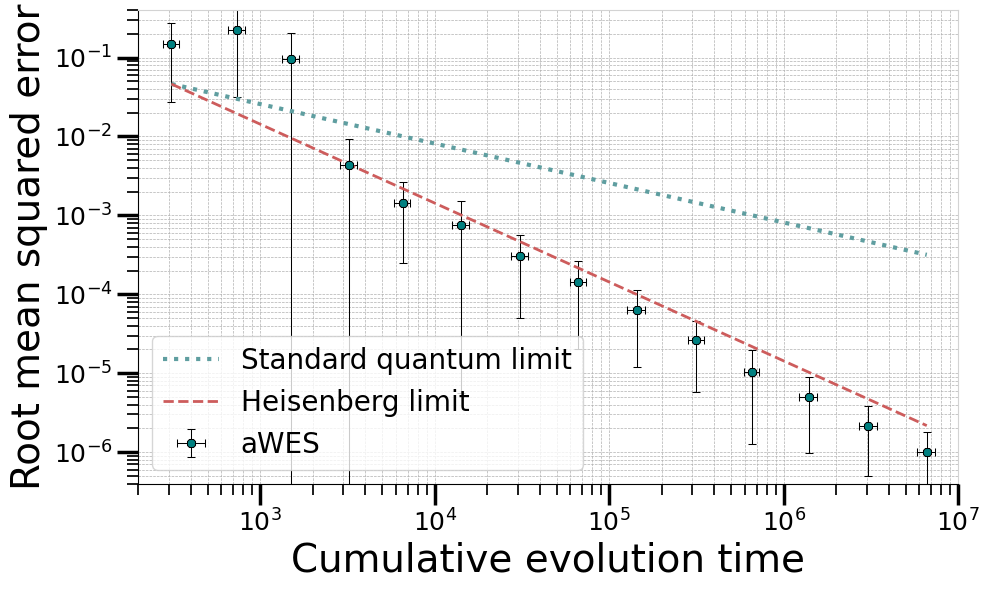

> PGH root mean squared error = O(Nq^-0.66); offset = 0.53.


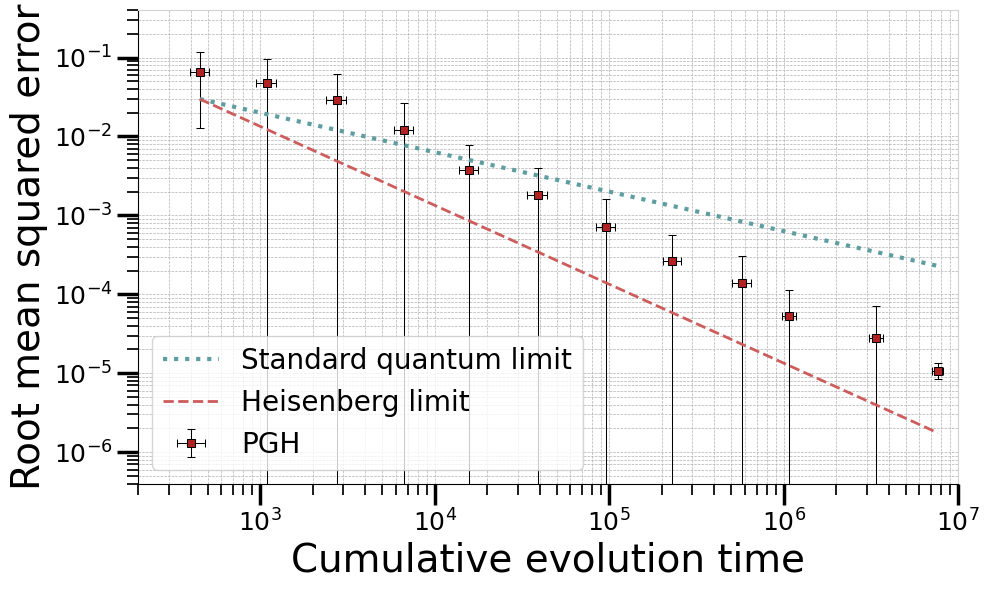

> RTS root mean squared error = O(Nq^-0.44); offset = -2.22.


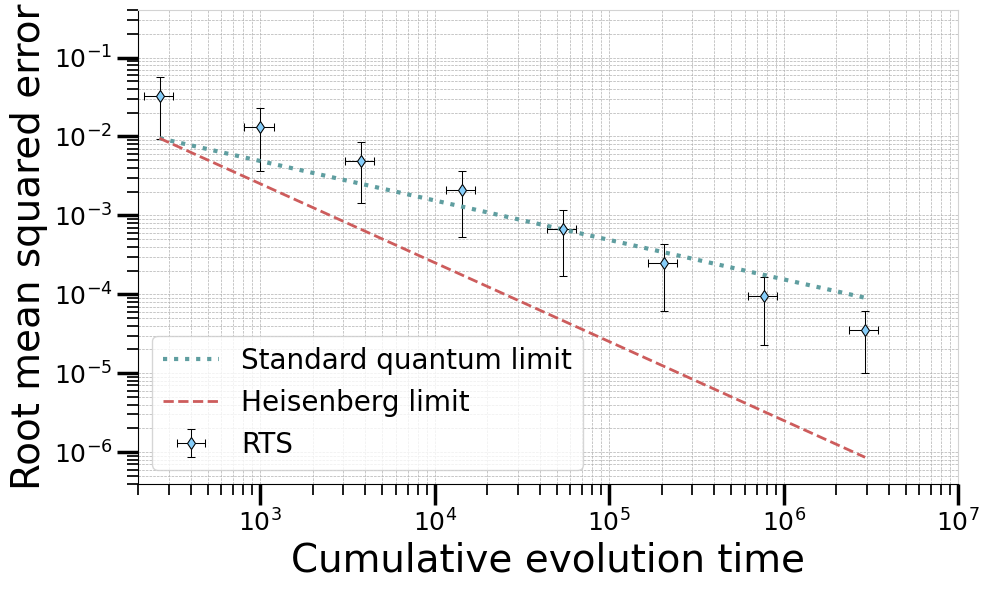

> SH root mean squared error = O(Nq^-0.86); offset = 1.64.


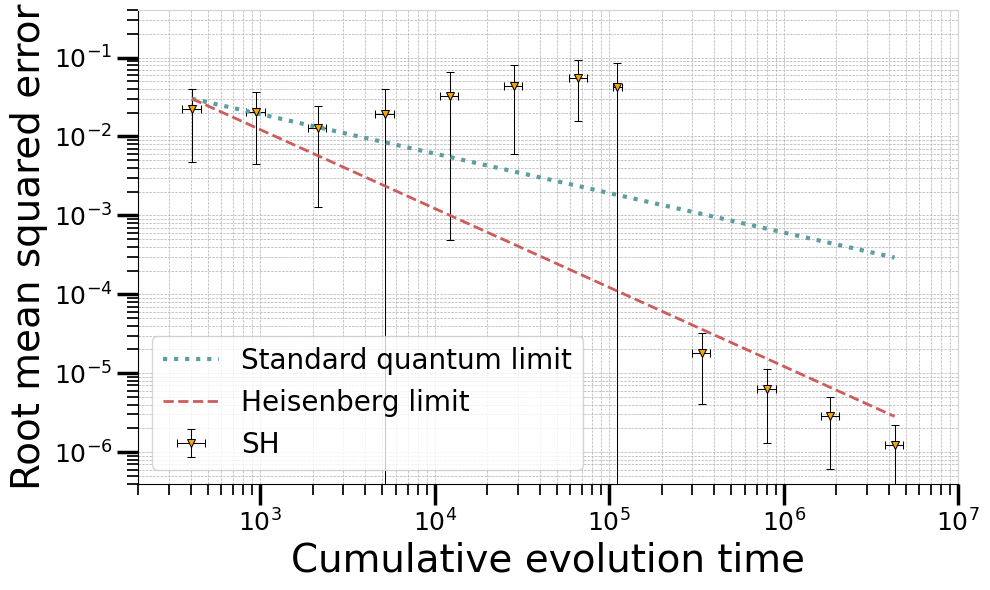

> WES root mean squared error = O(Nq^-1.0); offset = 1.77.


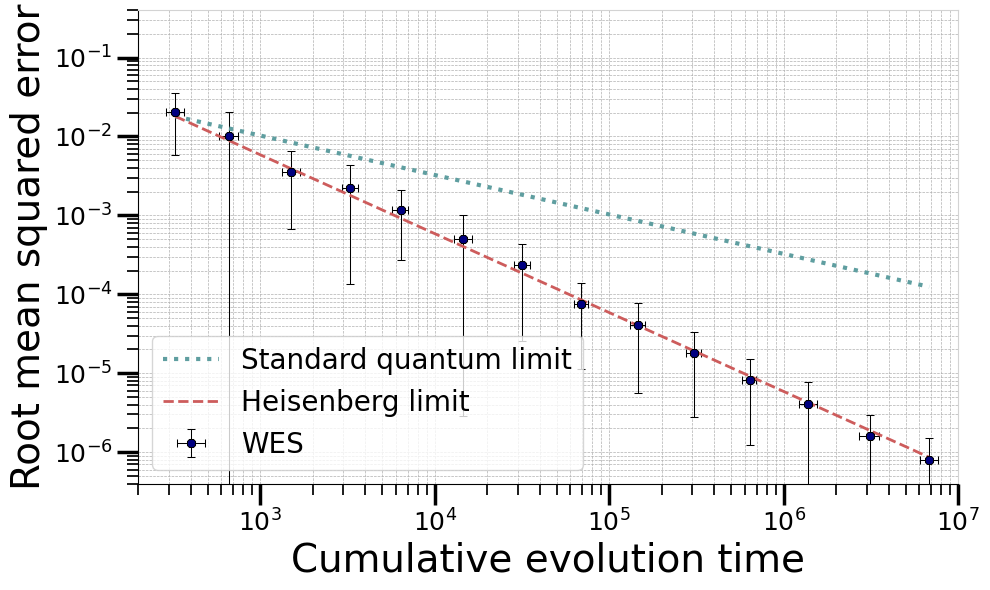

In [3]:
plot_estimation_from_files(noise = False, separate = True)

For further customization (axis limits, cut-off points, type of error display, statistics to take), use the function `plot_estimation_from_files` in `scripts/plotting_from_files`. Here we fix the value ranges and axis limits for a clearer comparison between strategies, but this can be changed by doing `xrg = None; axlims = None`.

### <a id='toc1_1_2_'></a>[Noisy case](#toc0_)

In this case, decoherence is present, in the form of exponential damping of the likelihood function. 

> Will plot frequency estimation results from folder 'noisy'.


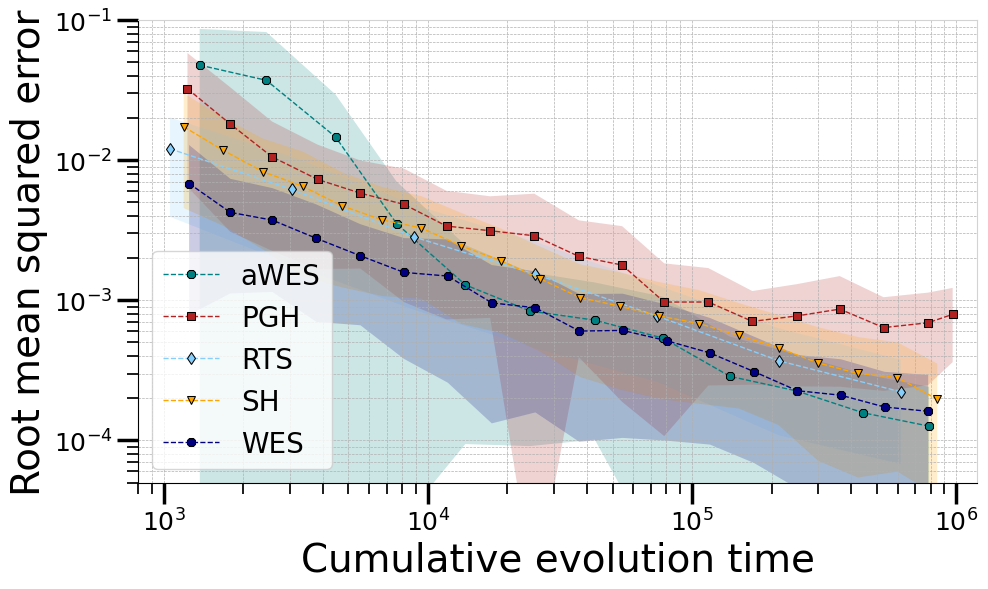

In [4]:
plot_estimation_from_files(noise = True, separate = False)

> Will plot frequency estimation results from folder 'noisy'.
> aWES root mean squared error = O(Nq^-1.0); offset = 3.95.


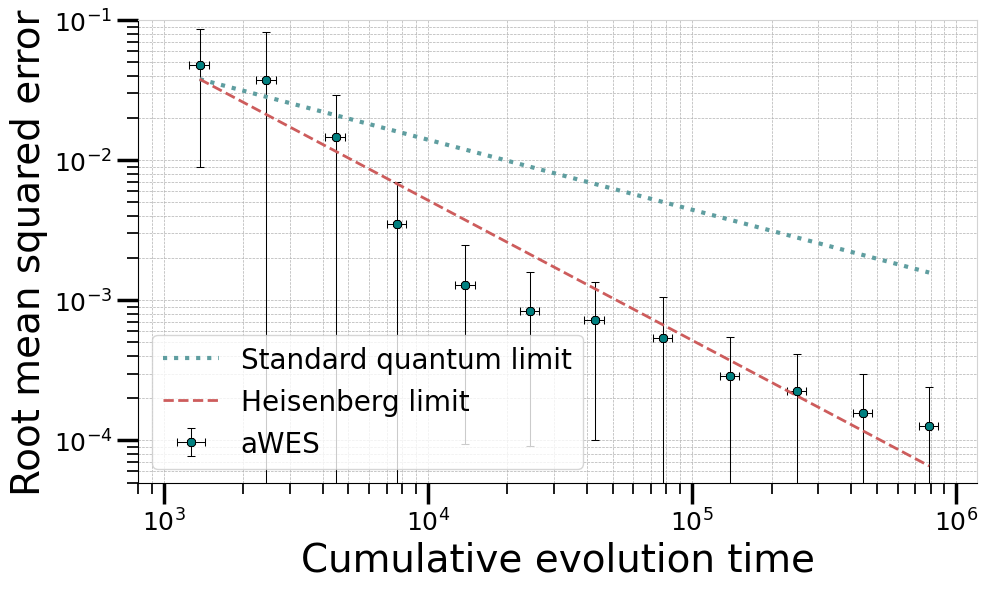

> PGH root mean squared error = O(Nq^-0.52); offset = -0.5.


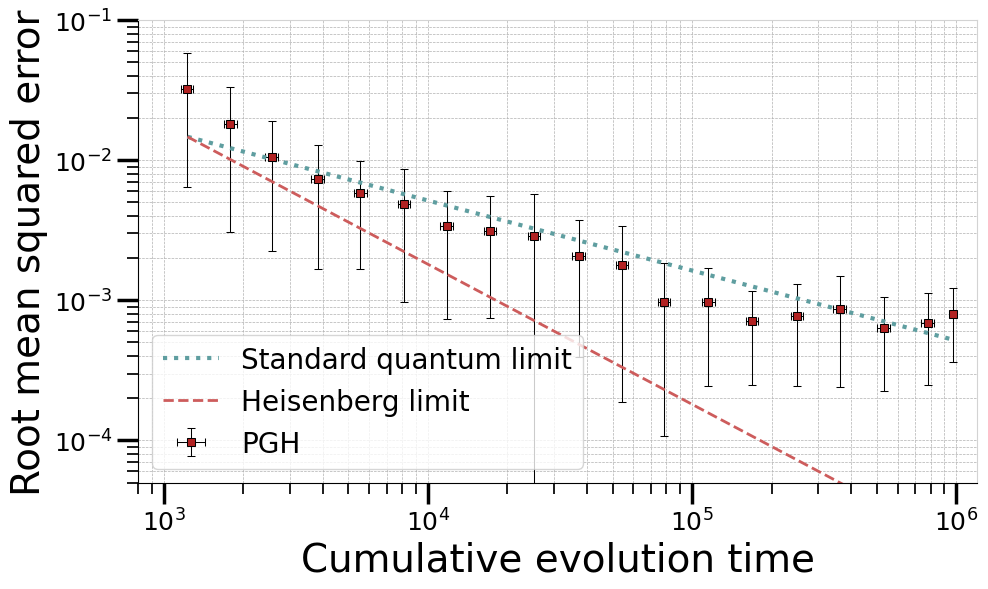

> RTS root mean squared error = O(Nq^-0.4); offset = -1.87.


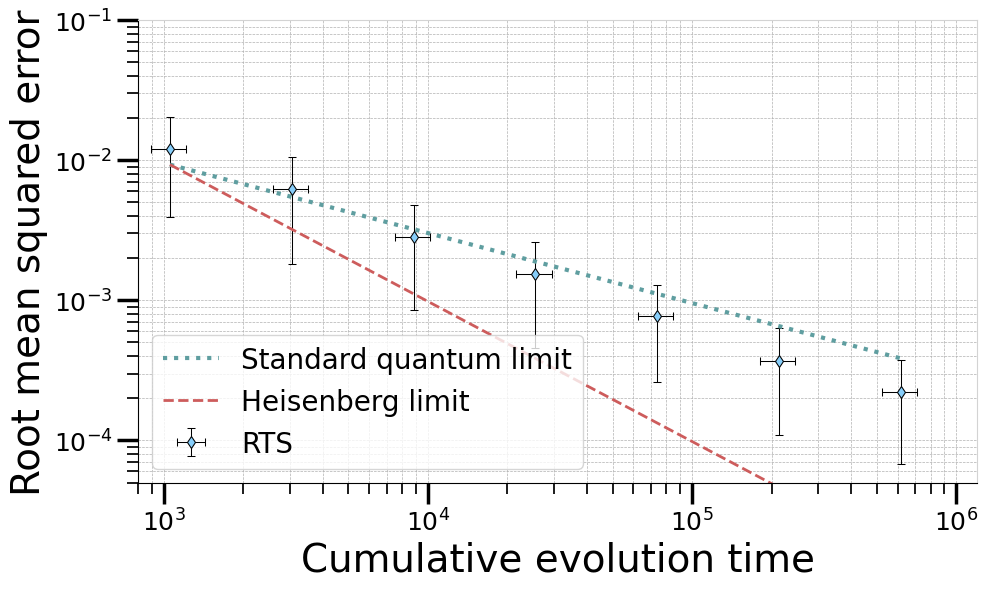

> SH root mean squared error = O(Nq^-0.65); offset = 0.22.


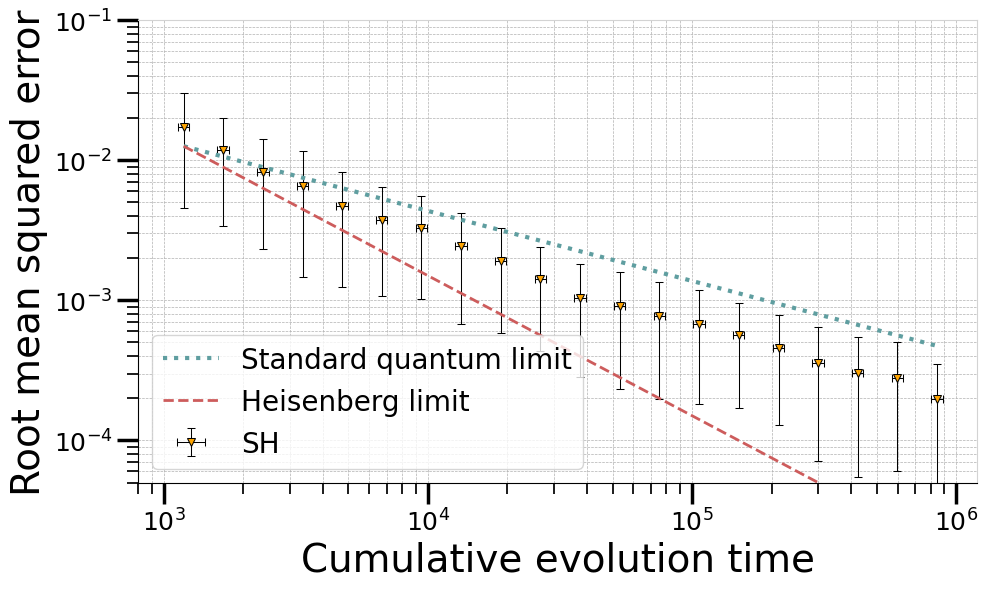

> WES root mean squared error = O(Nq^-0.55); offset = -1.34.


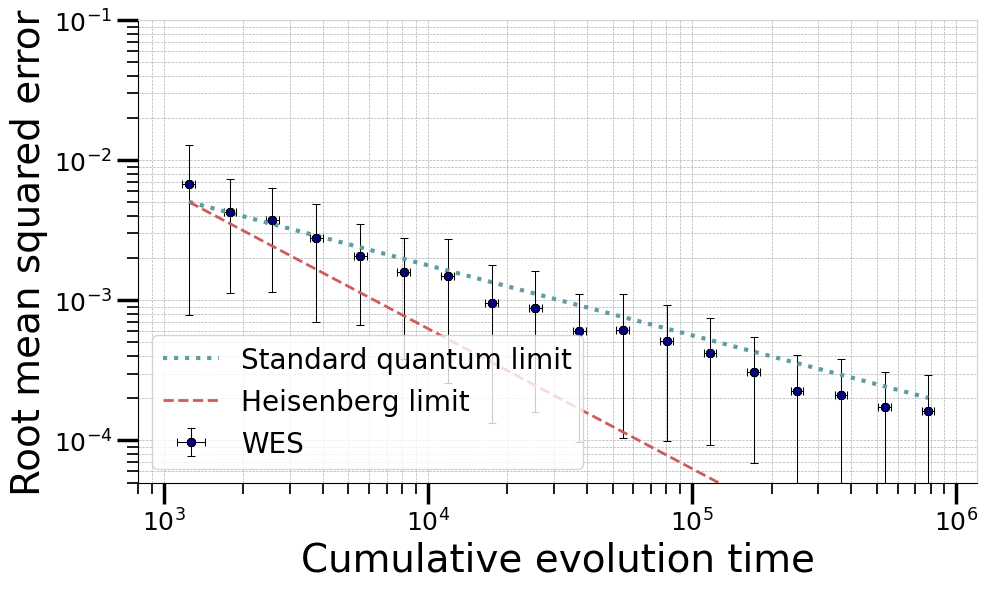

In [ ]:
plot_estimation_from_files(noise = True, separate = True)

## <a id='toc1_2_'></a>[Running the code](#toc0_)

In [ ]:
import numpy as np
from src.algorithms.heuristics import TestHeuristic
from src.algorithms.WES_testing import TestWES

# Define the arguments that are common to all the algorithms. 
Tcrange = None 
wmax = np.pi/2
w = (0,wmax)  
Tc = None 
maxPT = 1e7
nruns = 10
sampler_str = "RWM"
save = False
show = True
silent = True

# Strategy for dealing with decoherence.
Tc_opts = {"Tc": Tc,
            "Tc_precalc": True if Tc else False,
            "known_Tc": True,
            "range": Tcrange}

# Sampler arguments for the representation of the Bayesian distributions.
sampler_kwargs = {"Npart": 2000,
                  "c": 2.38,
                  "thr": 0.5,
                  "var": "w",
                  "ut": "var",
                  "log": True,
                  "res_ut": False,
                  "plot": False}

args = [w, wmax, Tc, maxPT, sampler_str, sampler_kwargs]
kwargs = dict(save = save, show = show, silent = silent) 

### <a id='toc1_2_1_'></a>[$1/\sigma$ heuristic (SH)](#toc0_)


> Will test 10 runs of 'SH'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> SH root mean squared error = O(Nq^-0.94); offset = 1.26.


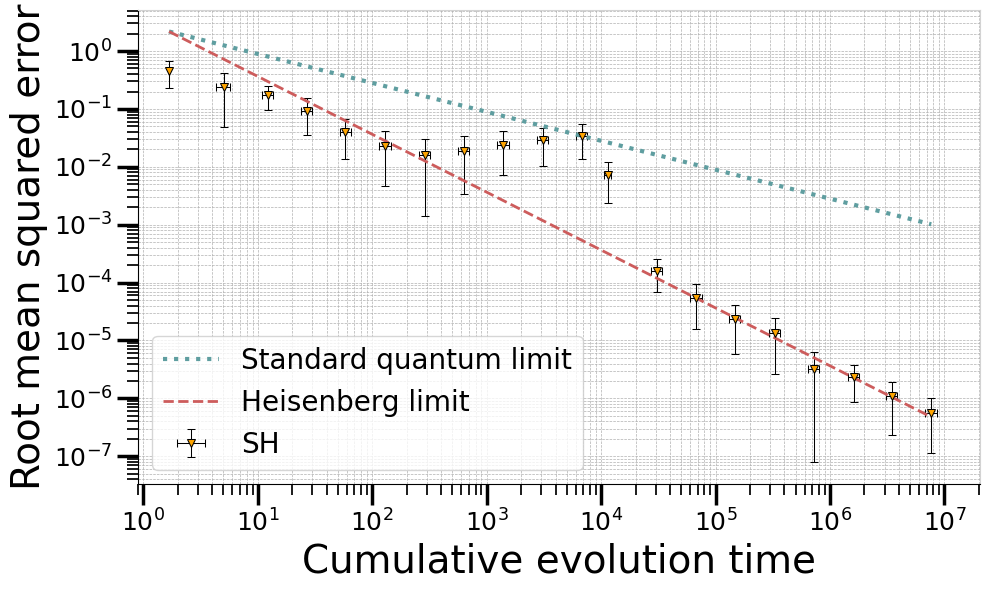

> SH mean standard deviation (normalized) = O(Nq^-0.93); offset = 2.15.


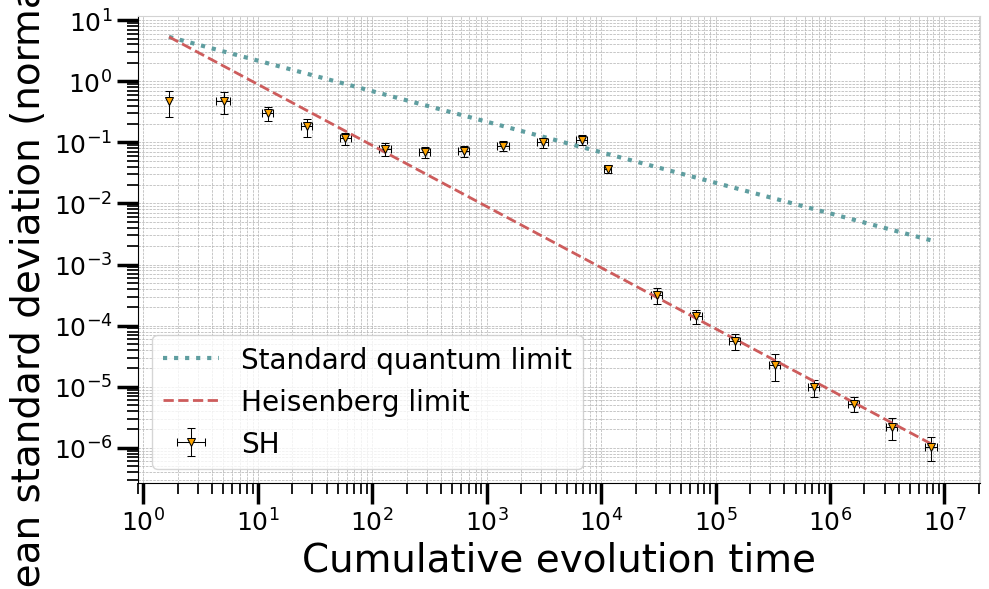

> SH median error = O(Nq^-0.93); offset = 1.28.


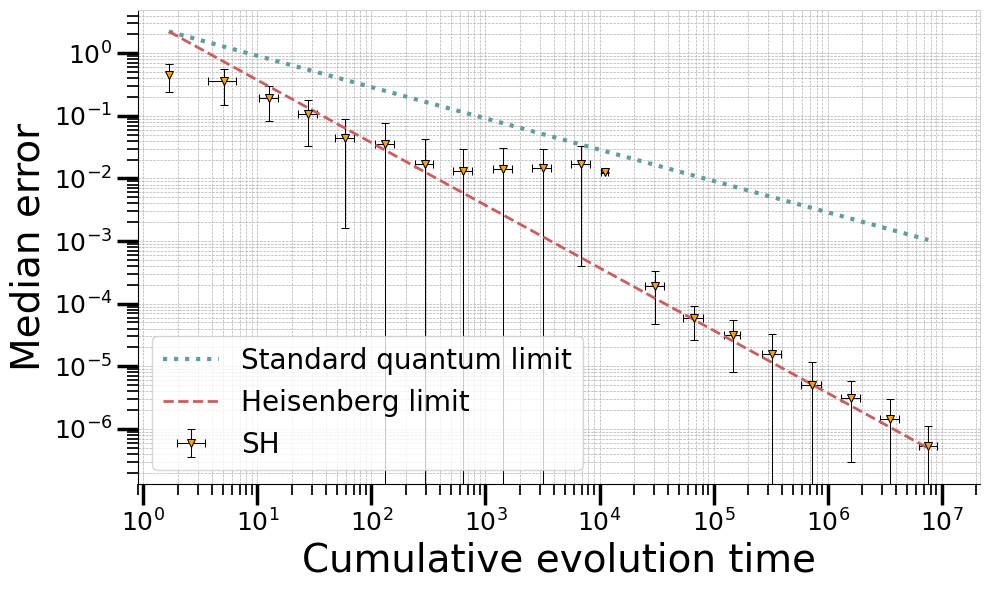

> SH median standard deviation (normalized) = O(Nq^-0.95); offset = 2.29.


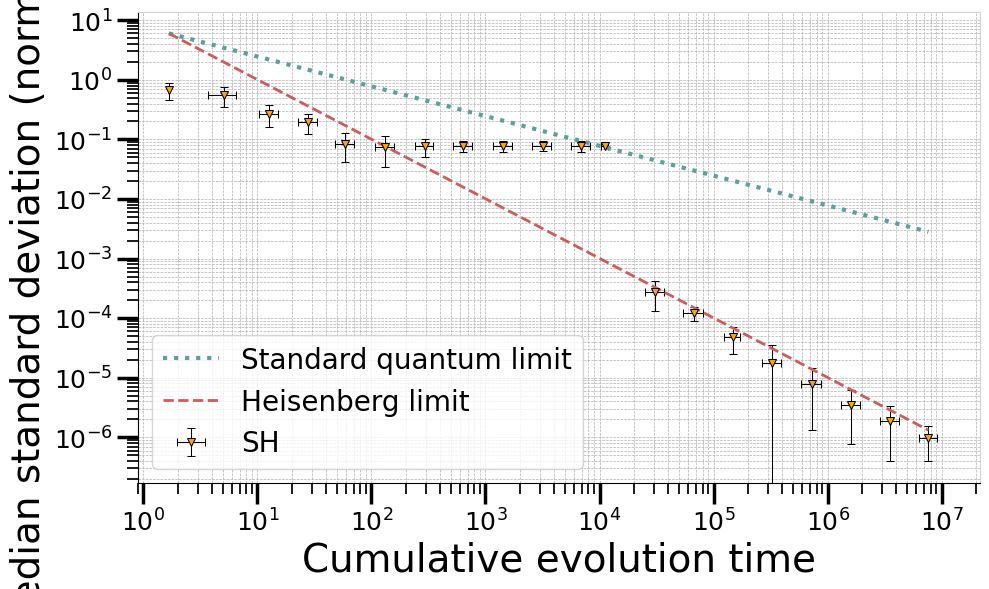

In [ ]:
strat = {"heuristic": "SH",
            "C": 0.76}

t = TestHeuristic(strat, *args, **kwargs)
t.sqe_evolution_multiple(nruns, redirect = 2)

### <a id='toc1_2_2_'></a>[Particle guess heuristic (PGH)](#toc0_)

> Will test 10 runs of 'PGH'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> PGH root mean squared error = O(Nq^-0.72); offset = 0.34.


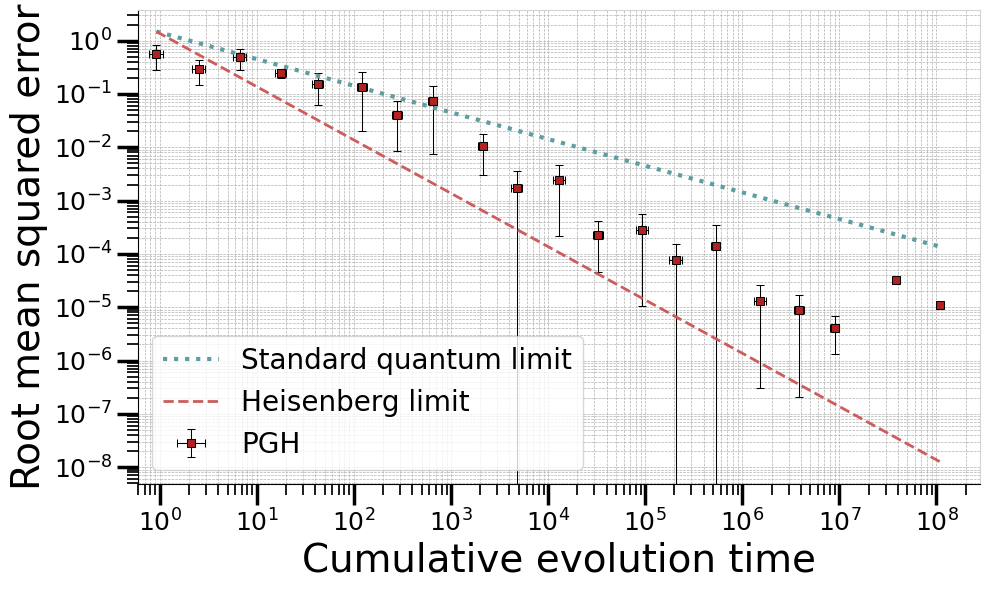

> PGH mean standard deviation (normalized) = O(Nq^-0.67); offset = 0.78.


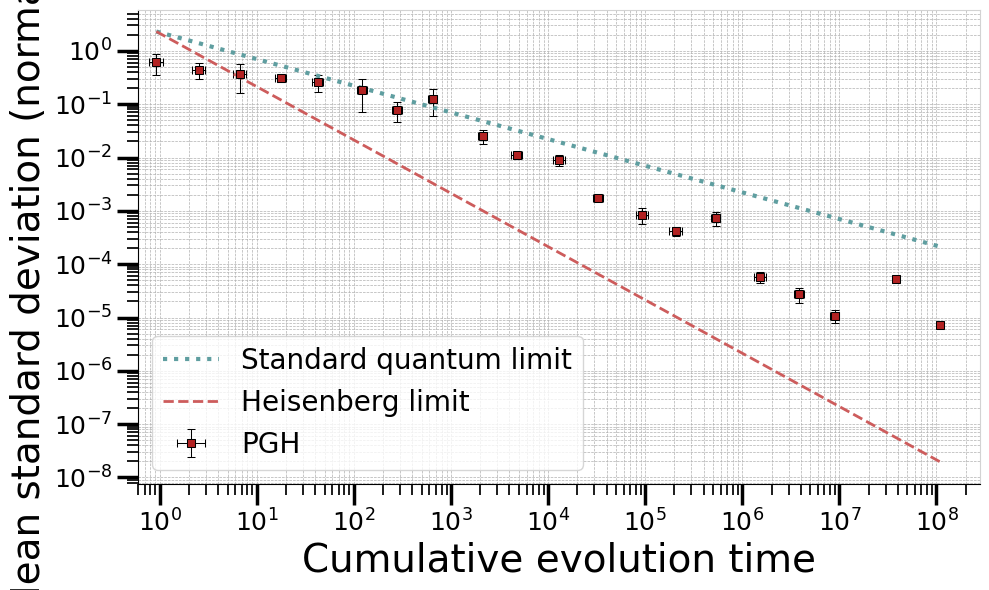

> PGH median error = O(Nq^-0.72); offset = 0.27.


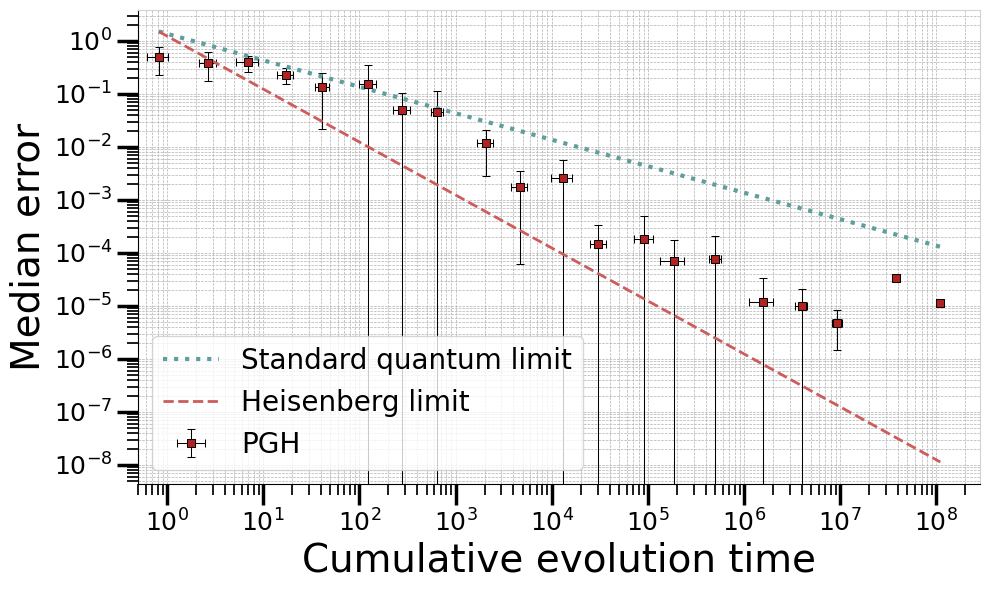

> PGH median standard deviation (normalized) = O(Nq^-0.67); offset = 0.73.


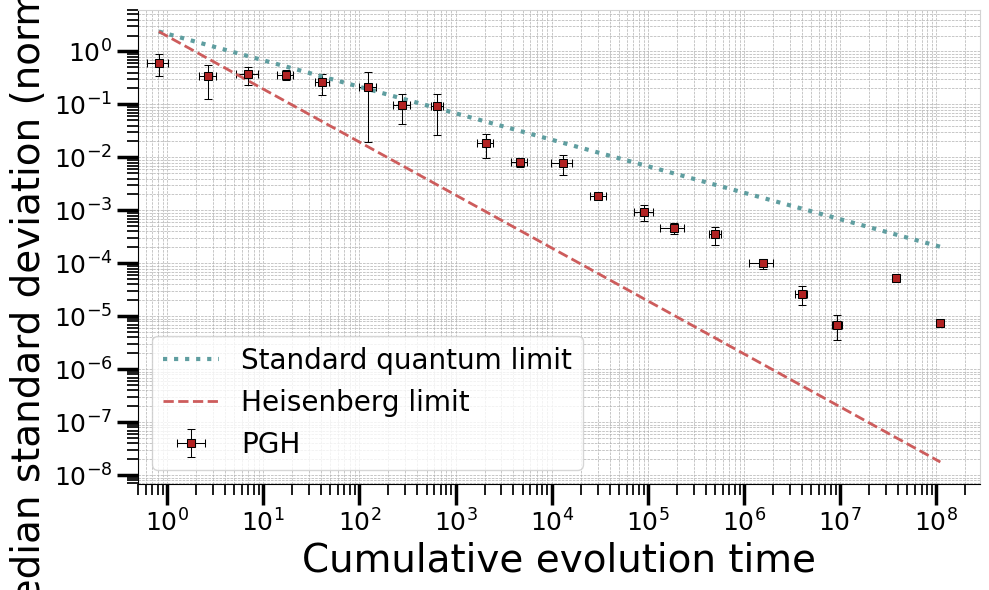

In [ ]:
strat = {"heuristic": "PGH",
            "C": 0.76}

t = TestHeuristic(strat, *args, **kwargs)
t.sqe_evolution_multiple(nruns, redirect = 2)

### <a id='toc1_2_3_'></a>[Random times strategy (RTS)](#toc0_)

> Will test 10 runs of 'RTS'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> RTS root mean squared error = O(Nq^-0.53); offset = -1.71.


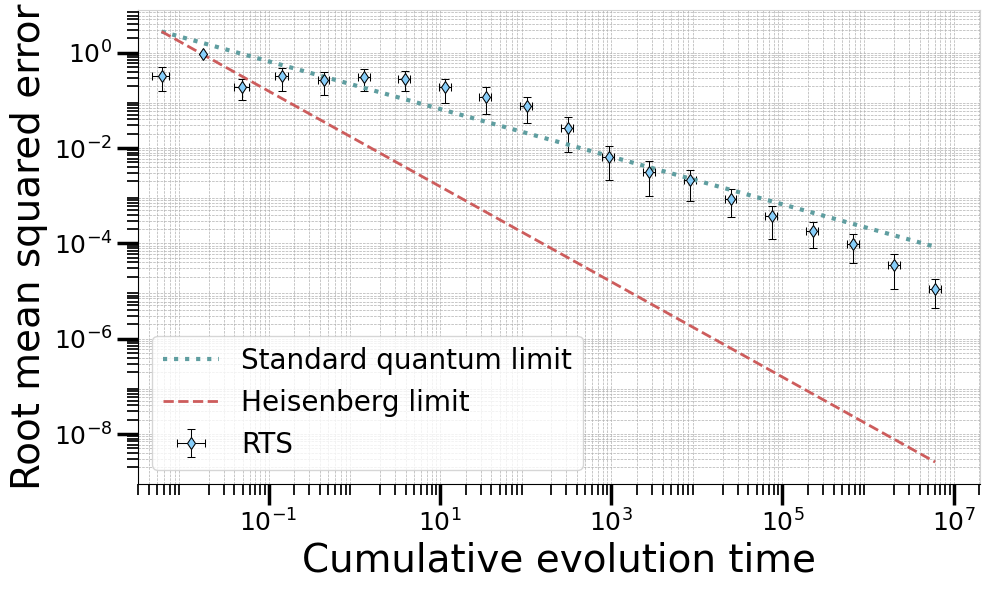

> RTS mean standard deviation (normalized) = O(Nq^-0.52); offset = -1.15.


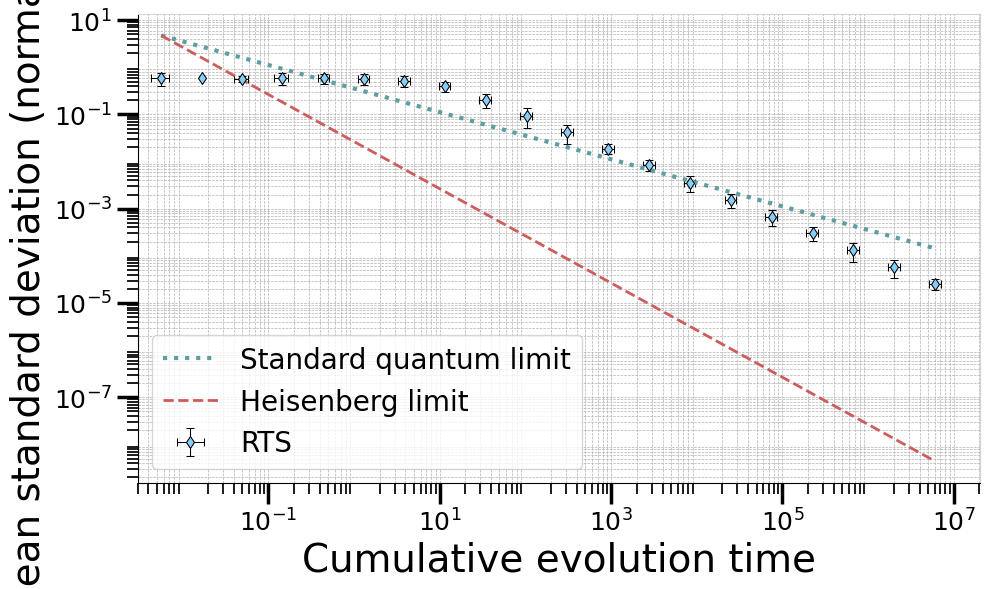

> RTS median error = O(Nq^-0.52); offset = -1.59.


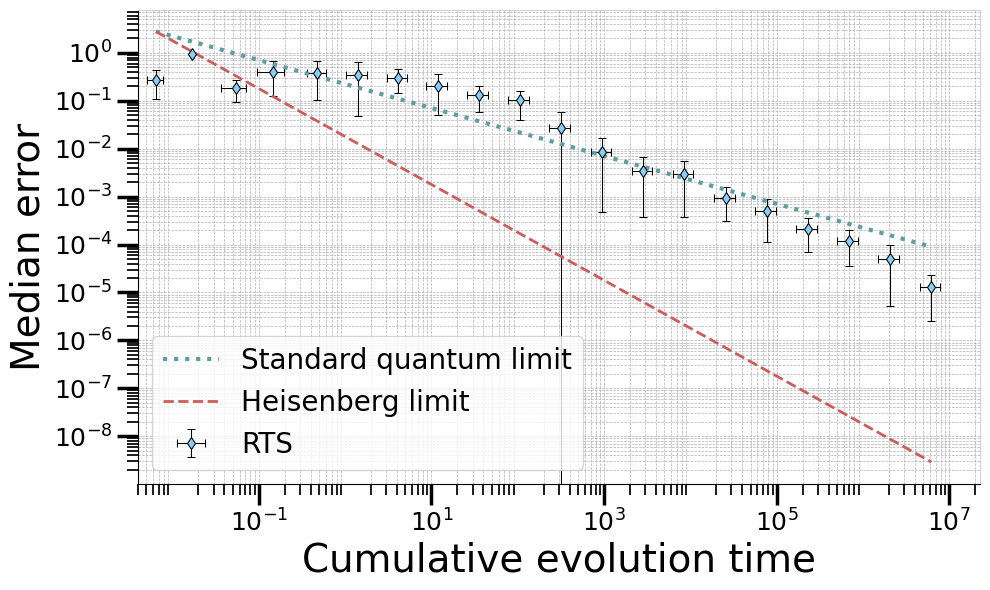

> RTS median standard deviation (normalized) = O(Nq^-0.52); offset = -1.09.


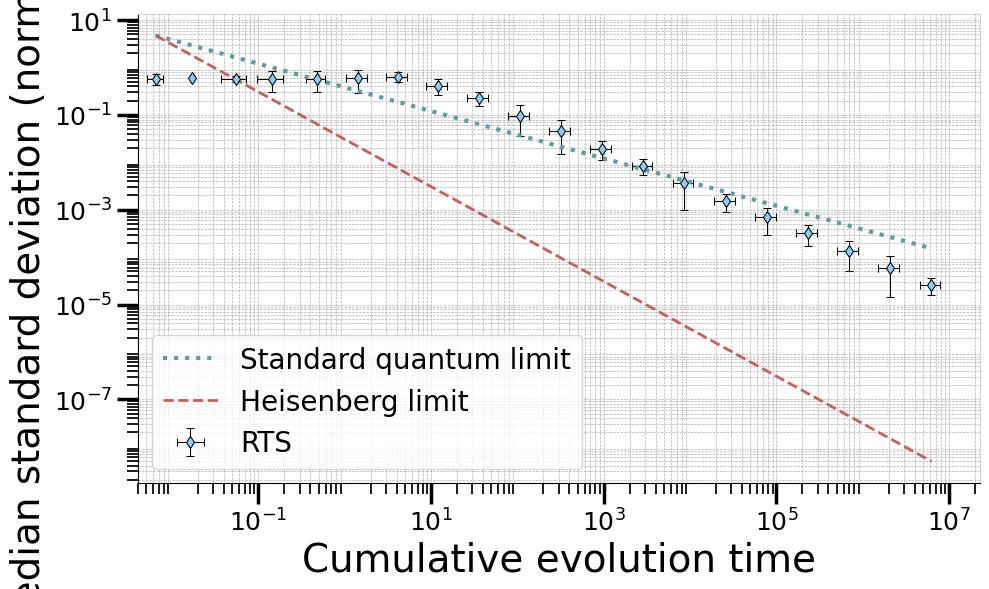

In [ ]:
strat = {"heuristic": "RTS",
            "C": 1e3}

t = TestHeuristic(strat, *args, **kwargs)
t.sqe_evolution_multiple(nruns, redirect = 2)

### <a id='toc1_2_4_'></a>[Window expansion heuristic (WES)](#toc0_)

> Will test 10 runs of 'WES'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> WES root mean squared error = O(Nq^-1.0); offset = 1.47.


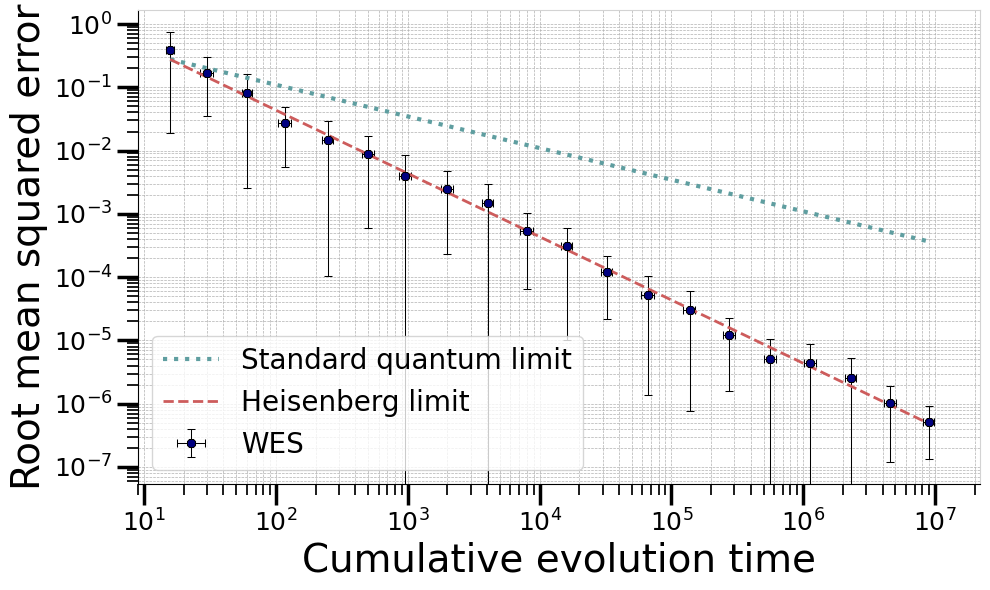

> WES mean standard deviation (normalized) = O(Nq^-0.93); offset = 1.83.


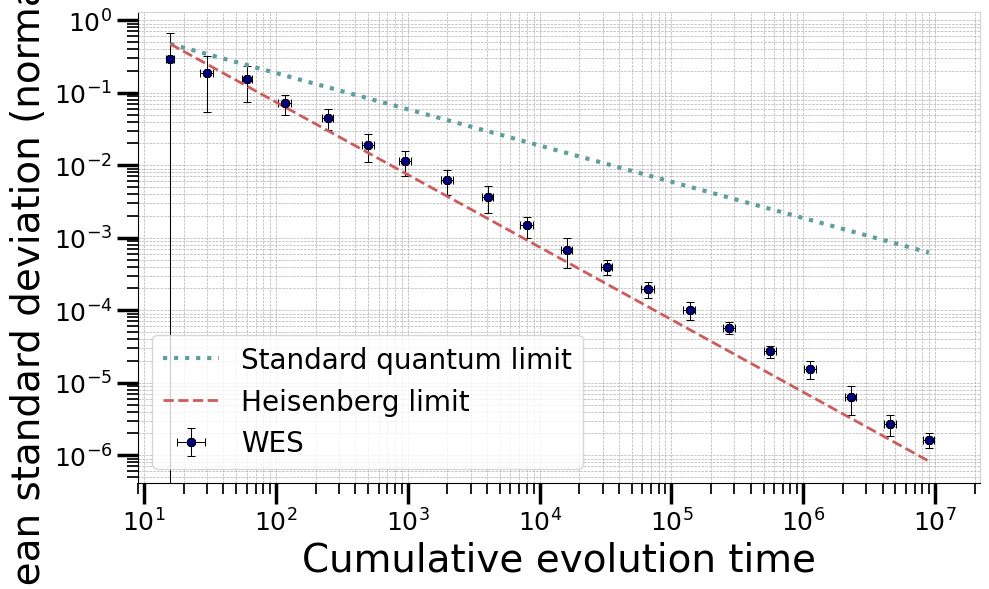

> WES median error = O(Nq^-1.0); offset = 1.18.


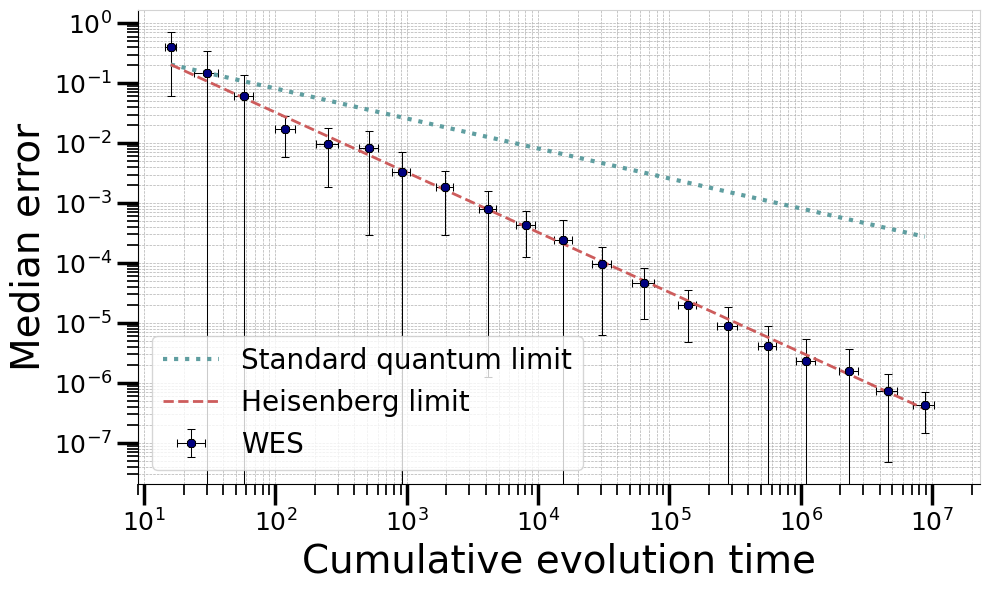

> WES median standard deviation (normalized) = O(Nq^-0.97); offset = 1.69.


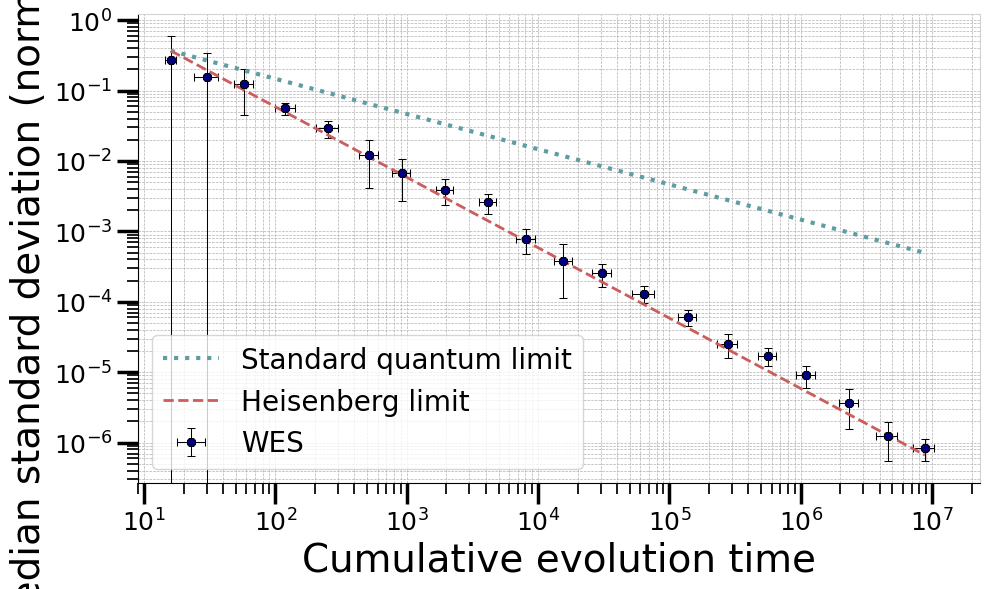

In [ ]:
# Strategy for the adaptive optimization.
strat = {"wNs": 10,
            "Ns": 1,
            "TNs": 500,
            "k": 2,
            "Nevals": 50,
            "erefs": 5,
            "ethr": 3,
            "cap": False,
            "capk": 2}

# Change the third argument, which for the previous strategies is just Tc. 
# Tc is assumed known by all strategies; with Tc_opts we could eg estimate it  
# instead. Could be implemented for heuristics too. 
args[2] = Tc_opts
Test = TestWES(strat, *args, **kwargs)

Test.sqe_evolution_multiple(nruns, redirect = 2)

### <a id='toc1_2_5_'></a>[Annealed window expansion strategy (WES)](#toc0_)

> Will test 10 runs of 'aWES'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> aWES root mean squared error = O(Nq^-1.0); offset = 3.28.


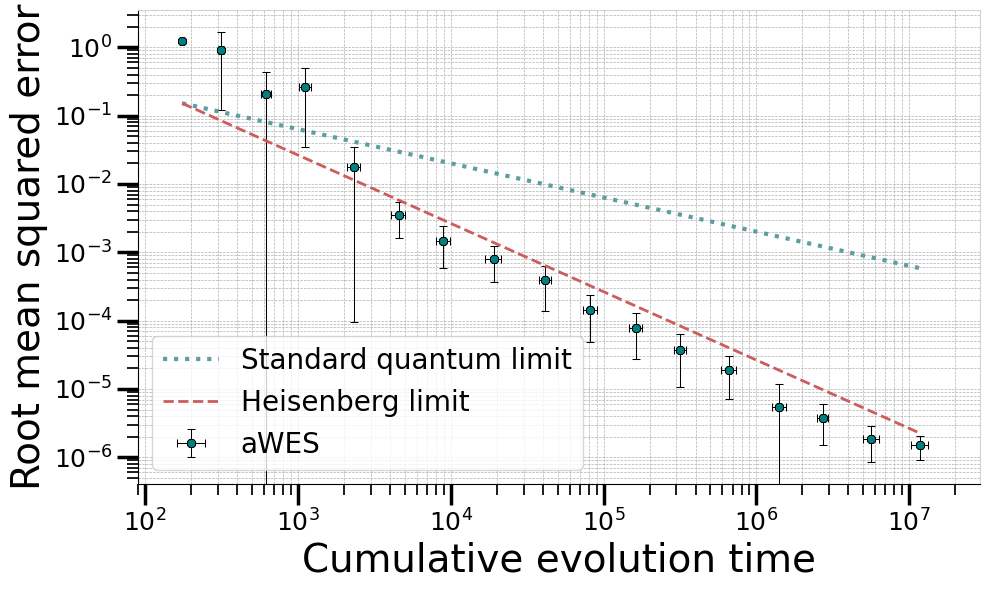

> aWES mean standard deviation (normalized) = O(Nq^-1.0); offset = 3.73.


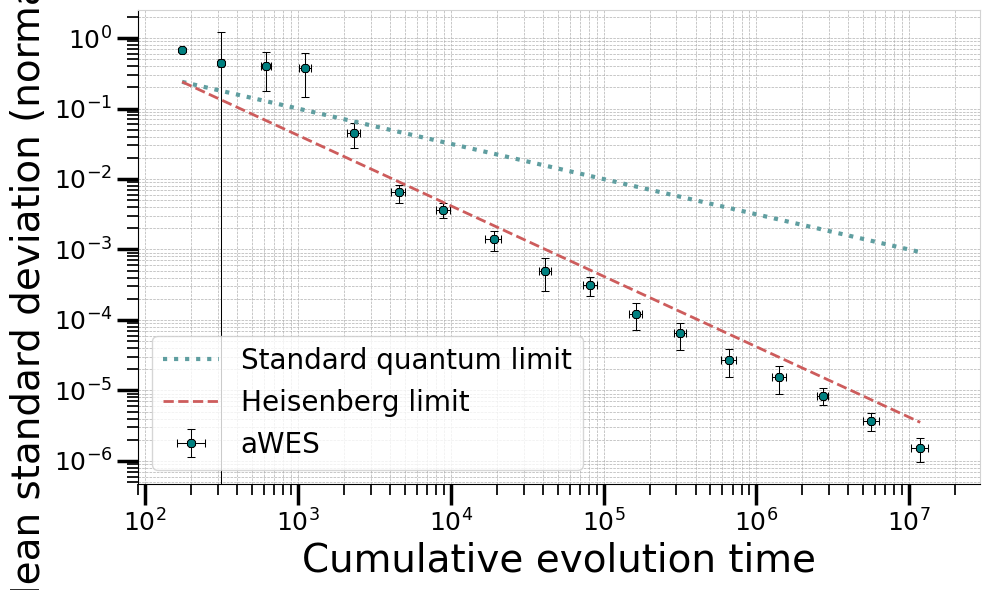

> aWES median error = O(Nq^-1.0); offset = 3.48.


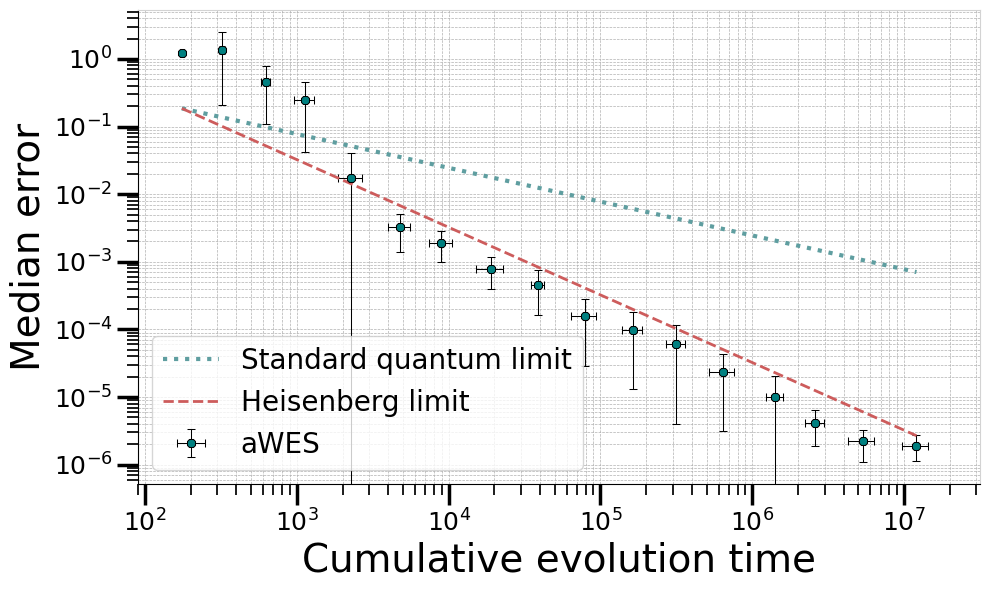

> aWES median standard deviation (normalized) = O(Nq^-1.0); offset = 3.69.


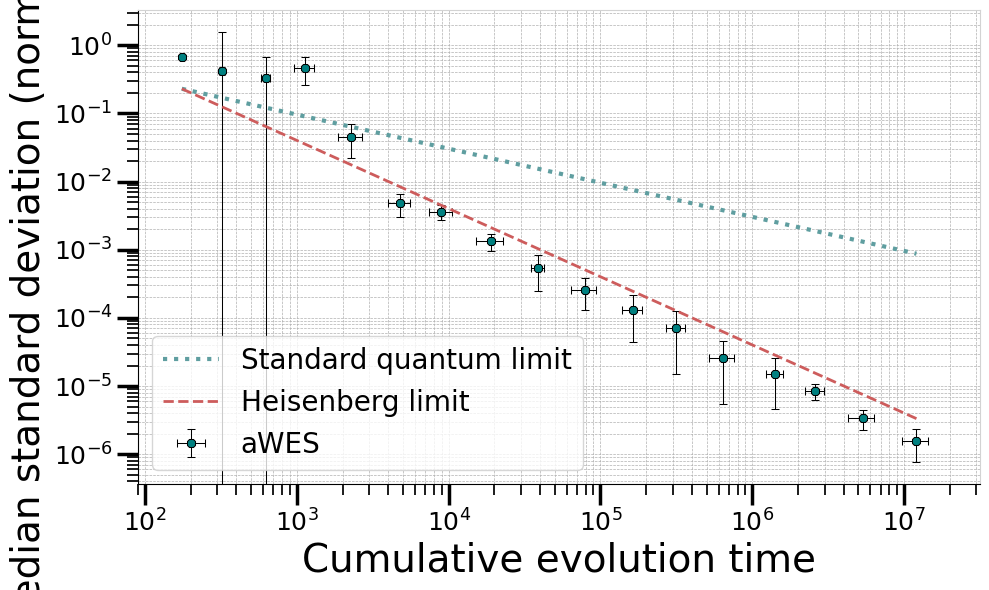

In [ ]:
# Strategy for the adaptive optimization.
strat = {"wNs": 10,
            "Ns": 10,
            "TNs": 500,
            "k": 2,
            "Nevals": 50,
            "erefs": 3,
            "ethr": 3,
            "cap": False,
            "capk": 2}

# As before for WES, in case cells are not run in order.
args[2] = Tc_opts
# Change sampler_kwargs item "ut" (utility), which distinguishes WES and aWES.
args[-1]["ut"] = "ESS"

Test = TestWES(strat, *args, **kwargs)
Test.sqe_evolution_multiple(nruns, redirect = 2)

## <a id='toc1_3_'></a>[References](#toc0_)

[1] Ferrie et al (2012). How to best sample a periodic probability distribution, or on the accuracy of Hamiltonian finding strategies.

[2] Wiebe et al (2014). Hamiltonian Learning and Certification Using Quantum Resources.